(2.5 points): As a Data Analyst, I want to set up the proper imports so I have access to the Pandas, Matplotlib, and MySQL Connector Python libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression



(2.5 points): As a Data Analyst, I want to use MySQL Connector to establish a connection to my remote data source
HINT: Check the Setup Steps for information about the credentials you will use for connecting

In [31]:
my_db = connection.connect(host='daflexsalesdb.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com', database='salesdb', user='root', password='D3v$tudent', use_pure='True')


In [32]:
my_query = """SELECT * FROM sales JOIN cities USING(City_ID)"""

df = pd.read_sql_query(my_query, my_db);
df


c:\Users\anben\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
0,1,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,3,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,3,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,1,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,894-41-5205,Normal,Female,Food and beverages,43.18,8,None,362.7120,1/19/2019,19:39,Credit card,345.44,17.2720,8.3,Milwaukee
996,2,895-03-6665,Normal,Female,Fashion accessories,36.51,9,None,345.0195,2/16/2019,10:52,Cash,328.59,16.4295,4.2,New York City
997,2,895-66-0685,Member,Male,Food and beverages,18.08,3,None,56.9520,3/5/2019,19:46,Ewallet,54.24,2.7120,8.0,New York City
998,1,896-34-0956,Normal,Male,Fashion accessories,21.32,1,None,22.3860,1/26/2019,12:43,Cash,21.32,1.0660,5.9,Seattle


(10 points): As a Data Analyst, I want to perform the necessary data cleaning and wrangling steps for my DataFrame.  This will include:
Exploring the information of the joined DataFrame
Checking for and removing null values, if necessary
Checking for and removing duplicate rows, if necessary
Converting any necessary columns to Pandas DateTime format


In [33]:
# #df.duplicated().sum()
# df.isnull().sum()
deduped_df= df.drop(columns='Sales_Tax')

#deduped_df= clean_df.T.drop_duplicates().T

# #& deduped_df[['Date','Time']]=pd.to_datetime(deduped_df[['Date','Time']])
# #deduped_df['Time']=pd.to_datetime(deduped_df['Time'])
deduped_df['Date']=pd.to_datetime(deduped_df['Date'])
deduped_df

#& print(df[df.duplicated()]);


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
0,1,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,3,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,3,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,1,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,12:22,Ewallet,42.96,2.1480,6.6,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,894-41-5205,Normal,Female,Food and beverages,43.18,8,362.7120,2019-01-19,19:39,Credit card,345.44,17.2720,8.3,Milwaukee
996,2,895-03-6665,Normal,Female,Fashion accessories,36.51,9,345.0195,2019-02-16,10:52,Cash,328.59,16.4295,4.2,New York City
997,2,895-66-0685,Member,Male,Food and beverages,18.08,3,56.9520,2019-03-05,19:46,Ewallet,54.24,2.7120,8.0,New York City
998,1,896-34-0956,Normal,Male,Fashion accessories,21.32,1,22.3860,2019-01-26,12:43,Cash,21.32,1.0660,5.9,Seattle


(15 points): As a Data Analyst, I want to explore my DataFrame to examine the spread of values across categories. I will utilize this exploration to answer the following questions:

How many sales were made for members vs. normal customers?

    Members accounted for 501 sales while normal customers accounted for 499.

How many sales were made at each store location?

    Seattle had the most sales with 340 items sold. New York City sold 332 and Milwaukee sold 328.

How many sales were made for each product line?

    Here are the results for each product line's sales:
    Fashion accessories       178
    Food and beverages        174
    Electronic accessories    170
    Sports and travel         166
    Home and lifestyle        160
    Health and beauty         152

What is the overall average rating, based on all sales records?

    The average rating is 6.97


In [34]:
member_vs_normal=deduped_df['Customer_Type'].value_counts()

location_sales=deduped_df['City'].value_counts()

product_sales=deduped_df['Product_Line'].value_counts()

average_rating=deduped_df['Rating'].mean()


(15 points): As a Data Analyst, I want to create three visualizations of my DataFrame to better understand any trends or patterns within my data set.  These charts will be a type of my choosing, and I can select which variables to analyze.  All three charts should contain the following:

A chart title

X-axis labels, if applicable

Y-axis labels, if applicable


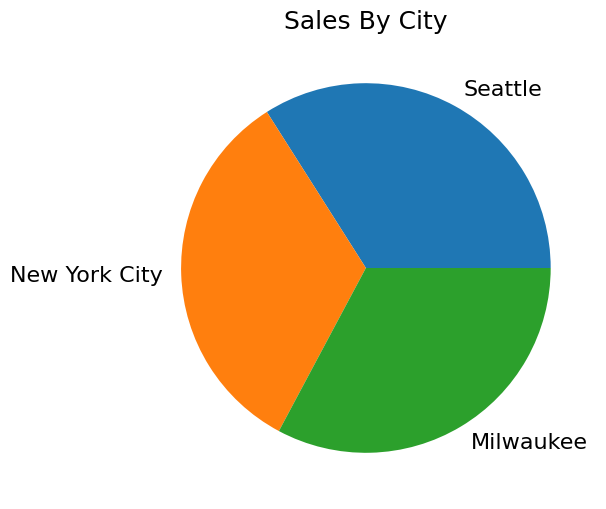

In [35]:
location_sales=deduped_df['City'].value_counts()
location_sales.plot.pie(figsize=(9,6),fontsize=16);
plt.ylabel('',fontsize=16)
plt.title('Sales By City',fontsize=18);






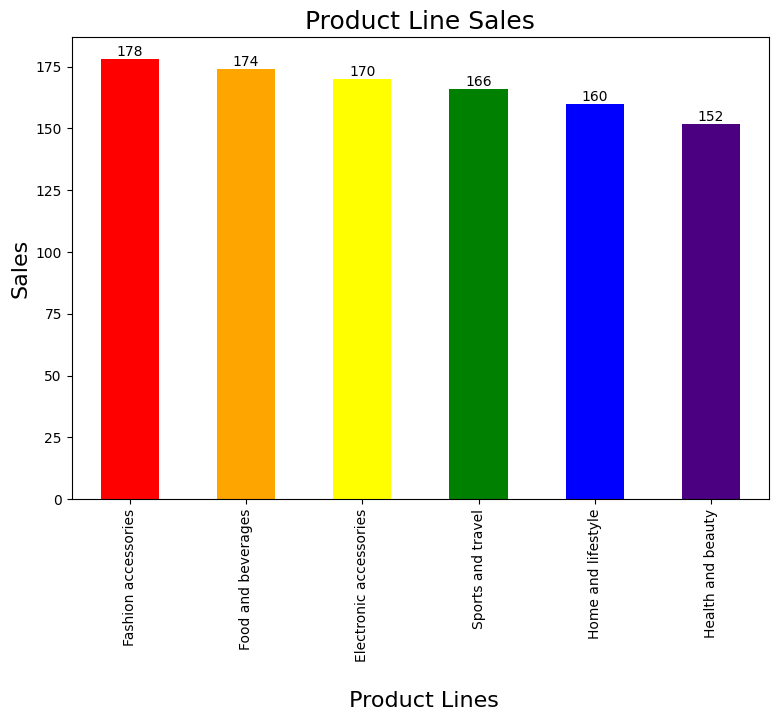

In [36]:
product_sales=deduped_df['Product_Line'].value_counts()
product_chart=product_sales.plot.bar(figsize=(9,6),fontsize=16,color=['Red','Orange','Yellow','Green','Blue','Indigo','Violet']);
plt.xlabel('\n Product Lines',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.title('Product Line Sales',fontsize=18)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
product_chart.bar_label(product_chart.containers[0]);

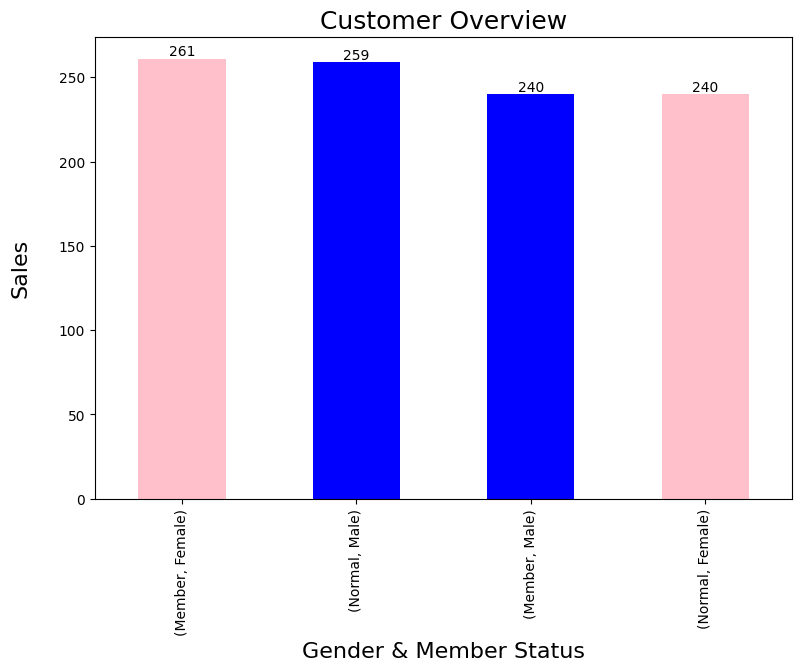

In [37]:
member_gender=deduped_df[['Customer_Type','Gender']].value_counts()
member_gender_chart=member_gender.plot.bar(figsize=(9,6),fontsize=16,color=['Pink','Blue','Blue','Pink']);
plt.xlabel('Gender & Member Status',fontsize=16)
plt.ylabel('Sales\n',fontsize=16)
plt.title('Customer Overview',fontsize=18)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
member_gender_chart.bar_label(member_gender_chart.containers[0]);

(2.5 points): As a Data Analyst, I want to describe numeric trends in my DataFrame, using the appropriate Pandas function

In [38]:

deduped_df.describe(datetime_is_numeric=True)



,City_ID,Unit_Price,Quantity,Total,Date,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.00000
mean,1.988000,55.672130,5.510000,322.966749,2019-02-14 00:05:45.600000,307.58738,15.379369,6.97270
min,1.000000,10.080000,1.000000,10.678500,2019-01-01 00:00:00,10.17000,0.508500,4.00000
25%,1.000000,32.875000,3.000000,124.422375,2019-01-24 00:00:00,118.49750,5.924875,5.50000
50%,2.000000,55.230000,5.000000,253.848000,2019-02-13 00:00:00,241.76000,12.088000,7.00000
75%,3.000000,77.935000,8.000000,471.350250,2019-03-08 00:00:00,448.90500,22.445250,8.50000
max,3.000000,99.960000,10.000000,1042.650000,2019-03-30 00:00:00,993.00000,49.650000,10.00000
std,0.817633,26.494628,2.923431,245.885335,NaN,234.17651,11.708825,1.71858


(2.5 points): As a Data Analyst, I want to explore the correlation between columns of my data set, using the appropriate Pandas function

In [39]:
deduped_df.corr()


,City_ID,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
City_ID,1.000000,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238
Unit_Price,0.028202,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.015964,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,0.010238,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


(5 points): As a Data Analyst, I want to note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot.  I will ensure my plot includes the following:
A chart title
An X-axis label
A Y-axis label


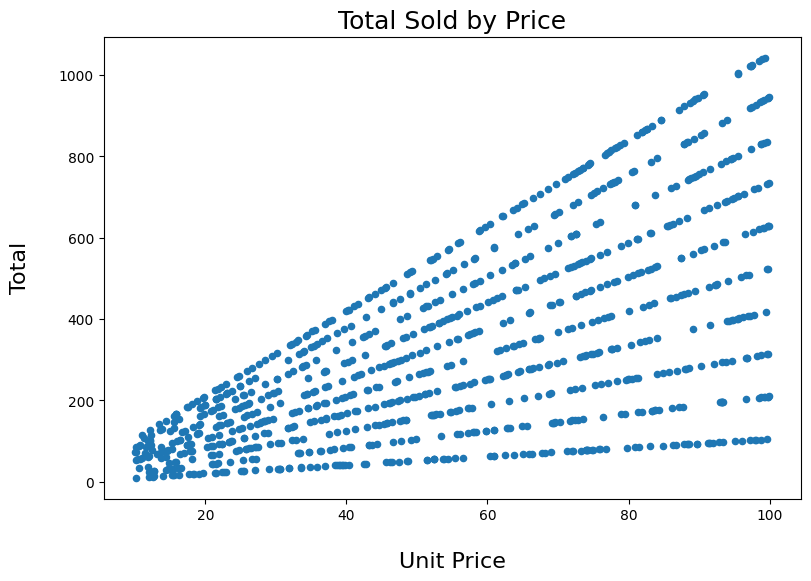

In [58]:
deduped_df.plot.scatter(x='Unit_Price',y='Total',figsize=(9,6));
plt.xlabel('\nUnit Price',fontsize=16)
plt.ylabel('Total\n',fontsize=16)
plt.title('Total Sold by Price',fontsize=18);



(5 points): As a Data Analyst, I want to reshape my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable

In [54]:
reshaped_x=deduped_df[['Unit_Price']]
reshaped_y=deduped_df['Total']

(5 points): As a Data Analyst, I want to create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.

In [55]:
model=LinearRegression()
model.fit(reshaped_x,reshaped_y)
predicted_y_values=model.predict(reshaped_x)

(10 points): As a Data Analyst, I want to create a visualization of my predictive model, and ensure I include the following stylizations:
A chart title
X-axis label
Y-axis label
A different color line for my predictive model

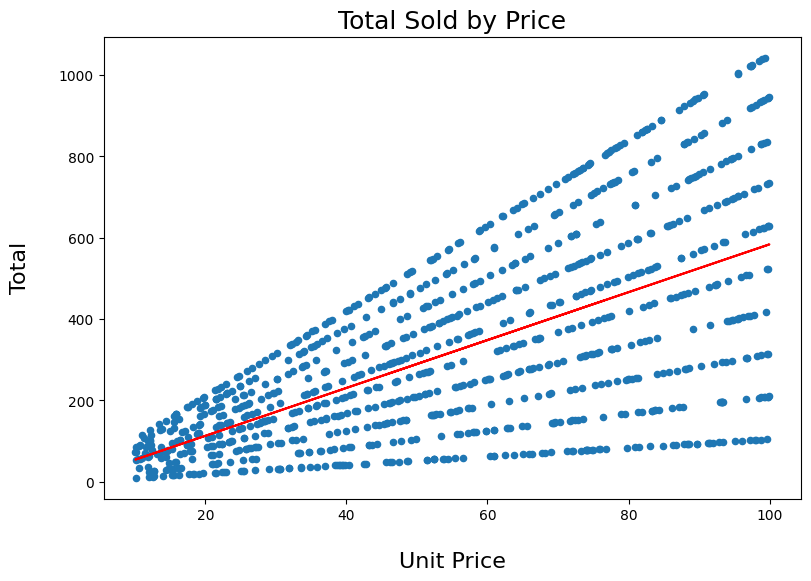

In [57]:
deduped_df.plot.scatter(x='Unit_Price',y='Total',figsize=(9,6));
plt.plot(reshaped_x,predicted_y_values,color='red');
plt.xlabel('\nUnit Price',fontsize=16)
plt.ylabel('Total\n',fontsize=16)
plt.title('Total Sold by Price',fontsize=18);

(15 points): As a Data Analyst, I want to present my findings as a Level I-style video recording (informal) that is no more than 5-8 minutes and covers the following:
The completed results of your Jupyter notebook
Key visualizations generated based off of evaluation questions
Any other cleaned/wrangled supporting data 
Communicate any insights you’ve gathered by working with the data
Make sure to address a specific individual in your video as if you were responding to a request for analysis (you can pick a fictional person or choose an instructor!)
